# Project Overview:

The objective of this project is for me to analyze the sales approaches for a new product line and provide valuable insights to the executive team. I need to understand the customer distribution for each approach, examine the revenue spread overall and for each method, assess any differences in revenue over time among the methods, and make a recommendation for the most effective approach to continue using. The analysis will also aim to provide context and highlight any potential variations between customer groups.

To accomplish this, I will gather data on the number of customers for each approach, as well as the revenue generated. By examining the spread of revenue, I can identify any variations in performance across the approaches. Additionally, a comparative analysis over time will reveal if there were any differences in revenue trends for each method. These insights will be crucial in determining the most successful approach for driving sales and informing the team's future strategies.

# DATA VALIDATION
The dataset initially contains 15,000 rows and 8 columns with 1074 missing values in the revenue column. Here are the cleaning and validation steps for each column in the dataset:

- week: 6 nominal categorical values without missing values. Converted data type to category.

- sales_method: Originally, there were 5 categories in the dataset, including 'Email', 'Call', 'Email + Call', 'em + call', and 'email'. However, 'em + call' and 'email' should be considered as 'Email + Call' and 'Email', respectively. I have mapped these categories and reduced them to 3 categories. Converted data type to category.

- customer_id: 15,000 unique customer identifiers without missing values. As expected

- nb_sold: Integer values without missing values. As expected.

- revenue: Float values with 1074 missing values. Filling the missing values in the "revenue" column with the mean of each sales method is applied because it considers the underlying structure of the data and the differences between the sales methods.

- years_as_customer: Integer values without missing values. As expected.
- nb_site_visits: Integer values without missing values. As expected.

- state: Categorical values without missing values, indicating the state where the customer is located. Converted data type to category.

After the data validation and cleaning, the dataset contains 15,000 rows and 8 columns with no missing values, and the sales_method column has been corrected for inconsistent capitalization, typos, ambiguous values, and sparse categories. Additionally, the columns in the dataset have been converted to their proper data types, ensuring that the data is represented accurately and facilitating appropriate analysis. The missing values in the revenue column have been filled with the mean of each sales method, providing a more accurate representation of the data and ensuring that subsequent analysis and modeling efforts are based on a dataset that respects the underlying structure and relationships within the data.

### IMPORTING LIBRARIES

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from scipy.stats import pearsonr
from statsmodels.formula.api import ols

### LOADING AND PREVIEWING PRODUCT SALES DATA

In [3]:
df=pd.read_csv('product_sales.csv')
df.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


### DATA EXPLORATION

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [5]:
duplicates = df[df.duplicated(keep=False)]

# print message if duplicates are found
if not duplicates.empty:
    print("The following rows are duplicates:")
    print(duplicates)
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [6]:
df.week.unique()

array([2, 6, 5, 4, 3, 1], dtype=int64)

In [7]:
df.week = df.week.astype('category')

In [8]:
df.sales_method.unique()

array(['Email', 'Email + Call', 'Call', 'em + call', 'email'],
      dtype=object)

The initial array ['Email', 'Email + Call', 'Call', 'em + call', 'email'] represents a column containing different sales methods. However, it includes some variations and duplicates, such as 'em + call' and 'email'. To clean and standardize this column, we can convert it into a categorical column with three distinct categories: 'Email', 'Email + Call', and 'Call'.

The updated representation ['Email', 'Email + Call', 'Call'] Categories (3, object): ['Call', 'Email', 'Email + Call'] indicates that the column has been transformed into a categorical format. The categories are now ordered as 'Call', 'Email', and 'Email + Call'. The column values are organized under these categories, ensuring consistency and facilitating further analysis or grouping based on sales methods.

In [9]:
mapping = {
    'Email': 'Email',
    'Call': 'Call',
    'Email + Call': 'Email + Call',
    'em + call': 'Email + Call',
    'email': 'Email'
}

df['sales_method'] = df['sales_method'].map(mapping)
df['sales_method'] = df['sales_method'].astype('category')
df['sales_method'].unique()

['Email', 'Email + Call', 'Call']
Categories (3, object): ['Call', 'Email', 'Email + Call']

In [10]:
df.customer_id.nunique()

15000

In [11]:
df.nb_sold.unique()

array([10, 15, 11,  9, 13,  8, 12,  7, 14, 16], dtype=int64)

In [12]:
df.revenue.nunique()

6743

In [13]:
df.years_as_customer.unique()

array([ 0,  1,  6,  3, 10,  9,  7,  4,  2, 20,  8,  5, 17, 36, 15, 14, 19,
       13, 12, 11, 30, 24, 22, 18, 26, 23, 32, 16, 39, 25, 33, 21, 31, 27,
       34, 28, 29, 35, 38, 37, 63, 47], dtype=int64)

In [14]:
df.nb_site_visits.unique()

array([24, 28, 26, 25, 22, 31, 23, 30, 21, 27, 32, 29, 20, 18, 19, 35, 16,
       17, 33, 36, 34, 15, 37, 14, 13, 12, 41], dtype=int64)

In [15]:
df.state.unique()

array(['Arizona', 'Kansas', 'Wisconsin', 'Indiana', 'Illinois',
       'Mississippi', 'Georgia', 'Oklahoma', 'Massachusetts', 'Missouri',
       'Texas', 'New York', 'Maryland', 'California', 'Tennessee',
       'Pennsylvania', 'North Dakota', 'Florida', 'Michigan',
       'North Carolina', 'Hawaii', 'Colorado', 'Louisiana', 'Virginia',
       'New Mexico', 'Arkansas', 'Alaska', 'Oregon', 'New Hampshire',
       'Ohio', 'New Jersey', 'Connecticut', 'Iowa', 'Montana',
       'Washington', 'Kentucky', 'Alabama', 'Nebraska', 'South Carolina',
       'Minnesota', 'South Dakota', 'Delaware', 'Maine', 'Utah',
       'West Virginia', 'Vermont', 'Rhode Island', 'Nevada', 'Idaho',
       'Wyoming'], dtype=object)

In [16]:
df.state = df.state.astype('category')

In [17]:
df.isnull().sum()

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64

In [18]:
missing_values = df[df['revenue'].isnull()]
missing_values_count = missing_values.groupby('sales_method').size()
print(missing_values_count)

sales_method
Call            181
Email           544
Email + Call    349
dtype: int64


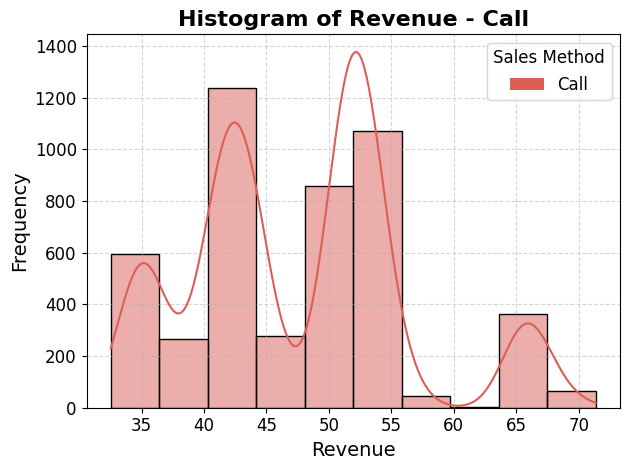

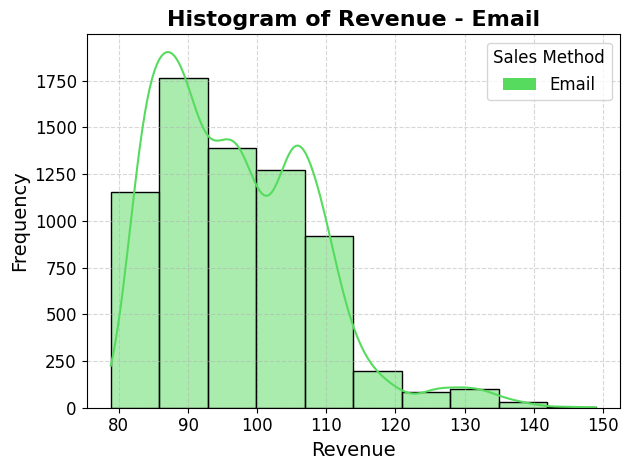

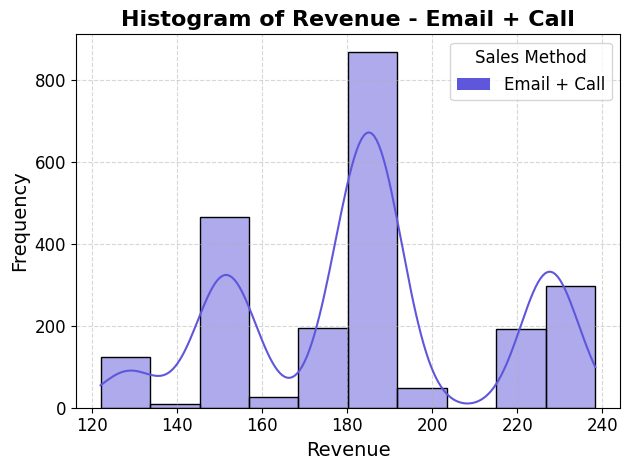

In [19]:
grouped_data = df.groupby("sales_method")
palette = sns.color_palette("hls", len(grouped_data))

for i, (method, group) in enumerate(grouped_data):
    fig, ax = plt.subplots()
    sns.histplot(data=group, x="revenue", bins=10, kde=True, color=palette[i], alpha=0.5, ax=ax)
    ax.set_xlabel("Revenue", fontsize=14)
    ax.set_ylabel("Frequency", fontsize=14)
    ax.set_title(f"Histogram of Revenue - {method}", fontsize=16, fontweight="bold")
    ax.tick_params(axis="both", which="major", labelsize=12)
    ax.grid(True, linestyle="--", alpha=0.5)
    custom_legend = [plt.Rectangle((0, 0), 1, 1, fc=palette[i], edgecolor="none")]
    ax.legend(custom_legend, [method], loc="upper right", fontsize=12, title="Sales Method", title_fontsize=12)
    plt.tight_layout()
    plt.show()

In [20]:
for method, group in grouped_data:
    print(f"Sales Method: {method}")
    print(group["revenue"].describe())

Sales Method: Call
count    4781.000000
mean       47.597467
std         8.609899
min        32.540000
25%        41.470000
50%        49.070000
75%        52.680000
max        71.360000
Name: revenue, dtype: float64
Sales Method: Email
count    6922.000000
mean       97.127684
std        11.210469
min        78.830000
25%        87.880000
50%        95.580000
75%       105.170000
max       148.970000
Name: revenue, dtype: float64
Sales Method: Email + Call
count    2223.000000
mean      183.651233
std        29.083924
min       122.110000
25%       155.775000
50%       184.740000
75%       191.110000
max       238.320000
Name: revenue, dtype: float64


Filling the missing values in the "revenue" column with the mean of each sales method is a reasonable approach because it considers the underlying structure of the data and the differences between the sales methods. With 7% of the revenue data missing overall, it's essential to address these missing values in a way that preserves the dataset's integrity.

Here are some reasons why using the mean for each sales method is a better choice:

1.  Different distributions: The summary statistics provided show that each sales method has a different distribution of revenue values. The mean, standard deviation, and other percentiles vary significantly across the sales methods. By using the mean revenue for each sales method, we acknowledge and respect these differences.

1. More accurate estimation: Using the mean of each sales method to fill in missing values helps to provide a more accurate estimation of the missing revenue data. If we were to use the overall mean, it could introduce bias and distort the relationship between the sales method and the revenue. By using the mean specific to each sales method, we preserve the relationship between the two variables, which is important for any subsequent analysis or modeling.

1. Real-world relevance: Different sales methods may have different levels of effectiveness in generating revenue. For instance, a combination of email and call might be more effective in closing sales than just email or call alone. By using the mean revenue for each sales method, we reflect this real-world scenario in our dataset, leading to more meaningful insights and better decision-making.

1. Addressing the 7% missing data: By using the mean revenue for each sales method to fill in the 7% of missing values, we minimize the impact of missing data on the overall dataset. This approach ensures that our dataset remains robust and representative of the true relationships between the variables, allowing us to draw accurate conclusions and make informed decisions based on the data.

In conclusion, using the mean revenue for each sales method to fill in the missing values is a more comprehensive approach because it takes into account the differences between the sales methods and their respective revenue distributions. This method provides a more accurate representation of the data and ensures that subsequent analysis and modeling efforts are based on a dataset that respects the underlying structure and relationships within the data, even when dealing with a 7% overall rate of missing values.

In [21]:
mean_revenue_call = df[df['sales_method'] == 'Call']['revenue'].mean()
mean_revenue_email = df[df['sales_method'] == 'Email']['revenue'].mean()
mean_revenue_email_call = df[df['sales_method'] == 'Email + Call']['revenue'].mean()


def fill_missing_revenue(row):
    if pd.isna(row['revenue']):
        if row['sales_method'] == 'Call':
            return mean_revenue_call
        elif row['sales_method'] == 'Email':
            return mean_revenue_email
        elif row['sales_method'] == 'Email + Call':
            return mean_revenue_email_call
    else:
        return row['revenue']


df['revenue'] = df.apply(fill_missing_revenue, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   week               15000 non-null  category
 1   sales_method       15000 non-null  category
 2   customer_id        15000 non-null  object  
 3   nb_sold            15000 non-null  int64   
 4   revenue            15000 non-null  float64 
 5   years_as_customer  15000 non-null  int64   
 6   nb_site_visits     15000 non-null  int64   
 7   state              15000 non-null  category
dtypes: category(3), float64(1), int64(3), object(1)
memory usage: 632.8+ KB


<h1 style="font-size: 36px;">EXPLORATORY DATA ANALYSIS</h1>

<h1 style="font-size: 25px;">How many customers and revenue were there for each approach?</h1>

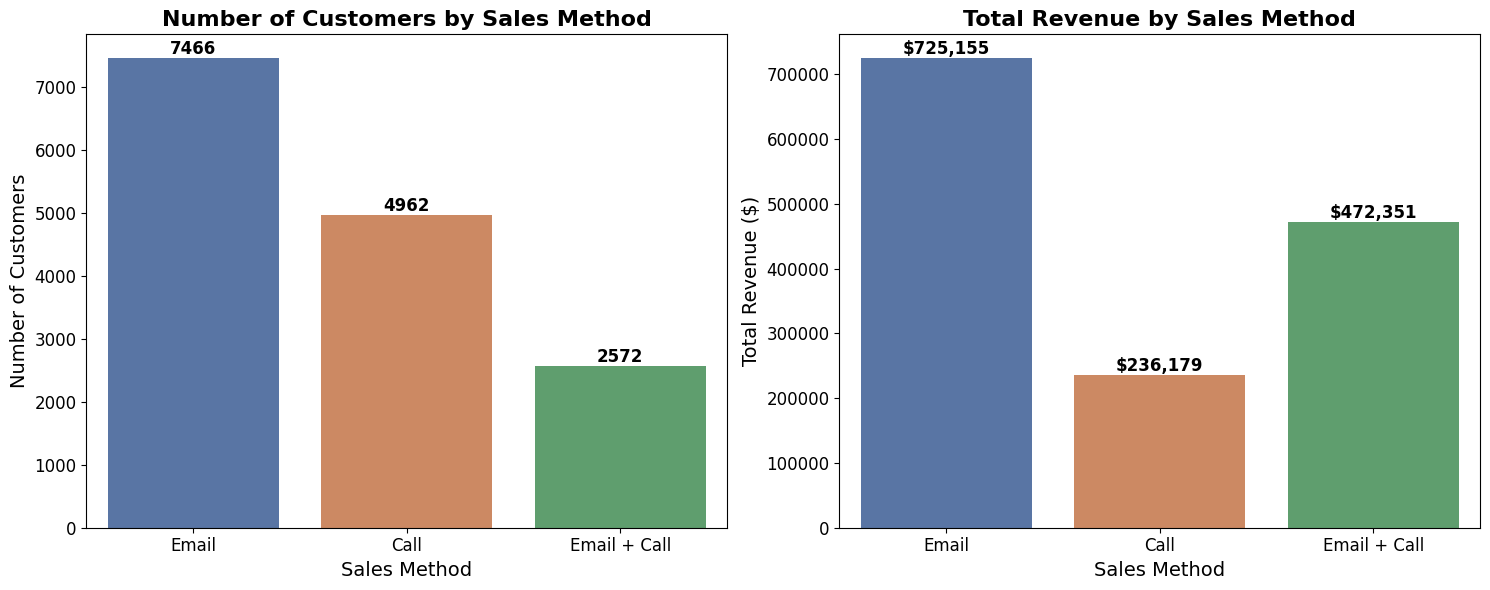

In [22]:
sales_methods = ['Email', 'Call', 'Email + Call']
sales_summary = []

for method in sales_methods:
    method_data = df[df['sales_method'] == method]
    num_customers = len(method_data)
    total_revenue = method_data['revenue'].sum()
    sales_summary.append((method, num_customers, total_revenue))

sales_summary_df = pd.DataFrame(sales_summary, columns=['Sales Method', 'Number of Customers', 'Total Revenue'])

fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=False)


palette = sns.color_palette("deep")


sns.barplot(x='Sales Method', y='Number of Customers', data=sales_summary_df, ax=axes[0], palette=palette)
axes[0].set_title('Number of Customers by Sales Method', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Sales Method', fontsize=14)
axes[0].set_ylabel('Number of Customers', fontsize=14)
axes[0].tick_params(axis='both', labelsize=12)

for i, row in sales_summary_df.iterrows():
    axes[0].text(i, row['Number of Customers'], row['Number of Customers'], ha='center', va='bottom', fontsize=12, fontweight='bold')


sns.barplot(x='Sales Method', y='Total Revenue', data=sales_summary_df, ax=axes[1], palette=palette)
axes[1].set_title('Total Revenue by Sales Method', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Sales Method', fontsize=14)
axes[1].set_ylabel('Total Revenue ($)', fontsize=14)
axes[1].tick_params(axis='both', labelsize=12)

for i, row in sales_summary_df.iterrows():
    axes[1].text(i, row['Total Revenue'], '${:,.0f}'.format(row['Total Revenue']), ha='center', va='bottom', fontsize=12, fontweight='bold')

fig.tight_layout()
plt.show()

1. Email is the most effective sales method in terms of customer acquisition, with 7,466 customers. However, when we consider the total revenue, Email is just slightly ahead of the Email + Call method, generating 725,155.29 compared to 472,350.97.

2. The Call method acquired the least number of customers, with 4,962 customers, and generated the lowest revenue, $236,178.63. This suggests that the Call method is the least effective sales method among the three.

3. The combination of Email and Call has significantly fewer customers (2,572) compared to the Email method, but it generates a comparable revenue of $472,350.97. This indicates that the Email + Call method might be more effective at acquiring higher-value customers.

In summary, my analysis reveals that the Email method is the most effective sales method in terms of customer acquisition and revenue generation, while the Call method lags behind the other two methods. The Email + Call method, although acquiring fewer customers, generates substantial revenue, suggesting its effectiveness in attracting higher-value customers. 

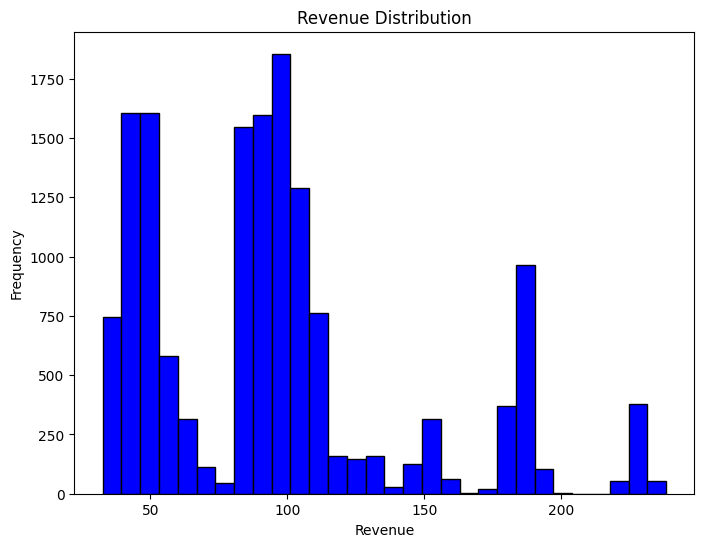

In [23]:
plt.figure(figsize=(8, 6))
plt.hist(df['revenue'], bins=30, color='blue', edgecolor='black')
plt.title("Revenue Distribution")
plt.xlabel("Revenue")
plt.ylabel("Frequency")
plt.show()

1. The revenue distribution appears to be skewed, with a higher frequency of transactions in the lower revenue ranges. For instance, the highest frequency (1,855) occurs in the bin with a revenue range of 94.27 to 101.13.

2. The distribution is not uniform, and there are a few noticeable spikes in the frequency. For example, the bins with revenue ranges of 80.56 to 87.41 and 87.41 to 94.27 have frequencies of 1,545 and 1,598, respectively, which are significantly higher compared to their neighboring bins.

3. The revenue range with the lowest frequency is between 204.02 and 210.88, with no transactions recorded in this range. This could indicate a gap in the pricing structure or that the products/services offered in this range are less popular among customers.

<h1 style="font-size: 25px;">What does the spread of the revenue look like overall? And for each method?</h1>

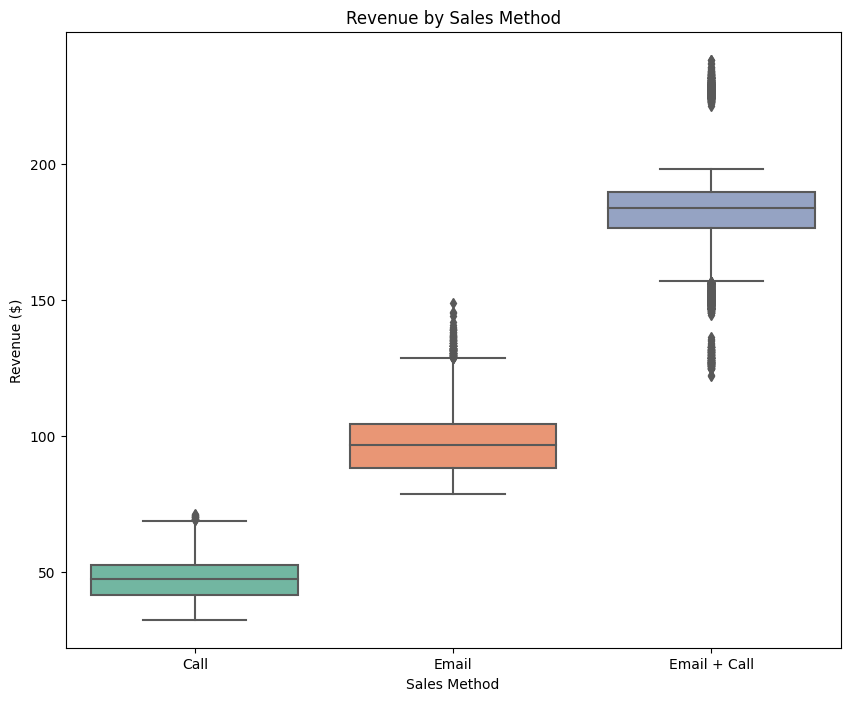

In [24]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='sales_method', y='revenue', data=df, palette='Set2', whis=1.5)
plt.title('Revenue by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Revenue ($)')
plt.show()

1. The mean revenue generated by each sales method varies significantly, with the Email + Call method generating the highest average revenue (183.65), followed by the Email method (97.13) and the Call method (47.60). This suggests that the combined approach of Email + Call is more effective in generating higher revenue per transaction.

2. The standard deviation of revenue for each sales method indicates the variation in revenue within each method. The Email + Call method has the highest variation (27.04), which could imply that customers acquired through this method have more diverse spending patterns. The Call method has the lowest variation in revenue (8.45), suggesting more consistent revenue generation within this method.

3. The minimum and maximum revenues also show noticeable differences across sales methods. The Call method has the lowest maximum revenue (71.36), whereas the Email + Call method has the highest maximum revenue (238.32). This indicates a wider range of revenue values in the Email + Call method compared to the Call method.

<h1 style="font-size: 25px;">Was there any difference in revenue over time for each of the methods?</h1>

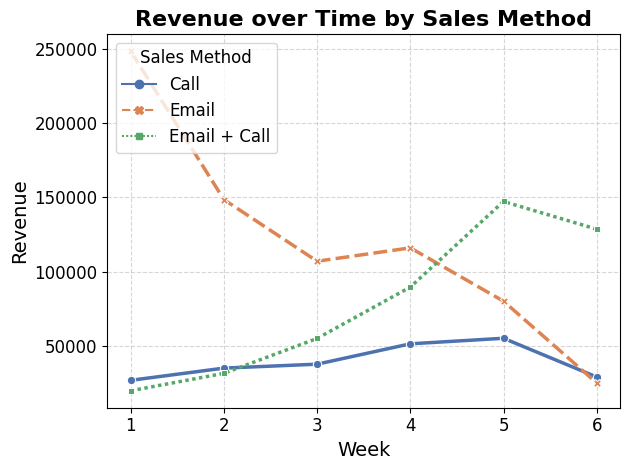

In [25]:
sales_revenue = df.groupby(['sales_method', 'week']).agg({'revenue': 'sum'}).reset_index()
sales_revenue_pivot = sales_revenue.pivot(index='week', columns='sales_method', values='revenue')


palette = sns.color_palette("deep")
sns.lineplot(data=sales_revenue_pivot, palette=palette, linewidth=2.5, markers=True)
plt.title('Revenue over Time by Sales Method', fontsize=16, fontweight='bold')
plt.xlabel('Week', fontsize=14)
plt.ylabel('Revenue', fontsize=14)
plt.tick_params(axis='both', labelsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="Sales Method", title_fontsize=12, fontsize=12, loc="upper left")


plt.tight_layout()
plt.show()

1. The Email sales method generated the highest revenue in the first week, with a total of 248,122.68. However, it experienced a decreasing trend over the following weeks, reaching its lowest point in week 6 with a revenue of 25,260.79. This decline could indicate a change in marketing effectiveness or customer behavior over time.

2. The Call sales method showed an overall increasing trend in revenue across the 6-week period. The revenue peaked in week 5 at 55,279.22 and dropped slightly in week 6 to 29,252.47. This suggests that the Call method may have gained momentum over time or experienced fluctuations in its effectiveness.

3. The Email + Call sales method displayed the most significant growth in revenue over the 6-week period. Starting at 20,007.40 in week 1, it steadily increased, reaching its highest point in week 5 with 147,195.01 in revenue. This highlights the effectiveness of combining the two sales methods to drive higher revenue.

### HYPOTHESIS TEST

In [26]:
def print_results(hypothesis, method, stat, p_value):
    print(f"{hypothesis} - {method}:")
    print(f"{'Statistic':<12}: {stat:.5f}")
    print(f"{'P-value':<12}: {p_value:.5f}")
    print()

sales_methods = ['Email', 'Call', 'Email + Call']

# Hypothesis 1: Customers with a higher 'years_as_customer' value generate more revenue
hypothesis = "H1: years_as_customer and revenue"
for method in sales_methods:
    method_data = df[df['sales_method'] == method]
    correlation, p_value = pearsonr(method_data['years_as_customer'], method_data['revenue'])
    print_results(hypothesis, method, correlation, p_value)

# Hypothesis 2: The revenue generated is influenced by the customer's location (state)
hypothesis = "H2: Revenue by state"
for method in sales_methods:
    method_data = df[df['sales_method'] == method]
    model = ols('revenue ~ C(state)', data=method_data).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print_results(hypothesis, method, anova_table.loc['C(state)', 'F'], anova_table.loc['C(state)', 'PR(>F)'])

# Hypothesis 3: The number of products sold ('nb_sold') is related to the 'years_as_customer' value
hypothesis = "H3: years_as_customer and nb_sold"
for method in sales_methods:
    method_data = df[df['sales_method'] == method]
    correlation, p_value = pearsonr(method_data['years_as_customer'], method_data['nb_sold'])
    print_results(hypothesis, method, correlation, p_value)

# Hypothesis 4: Customers with a higher number of site visits ('nb_site_visits') in the last six months generate more revenue
hypothesis = "H4: nb_site_visits and revenue"
for method in sales_methods:
    method_data = df[df['sales_method'] == method]
    correlation, p_value = pearsonr(method_data['nb_site_visits'], method_data['revenue'])
    print_results(hypothesis, method, correlation, p_value)

# Hypothesis 5: The week of the sale ('week') has an impact on the revenue generated
hypothesis = "H5: Revenue by week"
for method in sales_methods:
    method_data = df[df['sales_method'] == method]
    model = ols('revenue ~ C(week)', data=method_data).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print_results(hypothesis, method, anova_table.loc['C(week)', 'F'], anova_table.loc['C(week)', 'PR(>F)'])

H1: years_as_customer and revenue - Email:
Statistic   : -0.07862
P-value     : 0.00000

H1: years_as_customer and revenue - Call:
Statistic   : -0.10284
P-value     : 0.00000

H1: years_as_customer and revenue - Email + Call:
Statistic   : -0.09418
P-value     : 0.00000

H2: Revenue by state - Email:
Statistic   : 1.13524
P-value     : 0.24038

H2: Revenue by state - Call:
Statistic   : 1.12762
P-value     : 0.25172

H2: Revenue by state - Email + Call:
Statistic   : 0.92373
P-value     : 0.62479

H3: years_as_customer and nb_sold - Email:
Statistic   : -0.07881
P-value     : 0.00000

H3: years_as_customer and nb_sold - Call:
Statistic   : -0.10735
P-value     : 0.00000

H3: years_as_customer and nb_sold - Email + Call:
Statistic   : -0.09154
P-value     : 0.00000

H4: nb_site_visits and revenue - Email:
Statistic   : 0.36518
P-value     : 0.00000

H4: nb_site_visits and revenue - Call:
Statistic   : 0.50674
P-value     : 0.00000

H4: nb_site_visits and revenue - Email + Call:
Statist

I conducted a series of hypothesis tests to investigate the relationship between various factors and the revenue generated by different sales methods (Email, Call, and Email + Call). In this data, we will focus on the statistically significant results and discuss their implications for sales performance.

Statistically Significant Results:

### Hypothesis 1: years_as_customer and revenue


Email: Statistic: -0.07862, P-value: 0.00000

Call: Statistic: -0.10284, P-value: 0.00000

Email + Call: Statistic: -0.09418, P-value: 0.00000

The negative correlation between years_as_customer and revenue is significant for all sales methods. This indicates that as the number of years a customer has been with the company increases, the revenue generated from them decreases. This could suggest that long-term customers may become less responsive to marketing efforts over time.

### Hypothesis 3: years_as_customer and nb_sold


Email: Statistic: -0.07881, P-value: 0.00000

Call: Statistic: -0.10735, P-value: 0.00000

Email + Call: Statistic: -0.09154, P-value: 0.00000

A similar pattern is observed for the number of products sold (nb_sold) and years_as_customer, with a significant negative correlation for all sales methods. As the years_as_customer value increases, the number of products sold to the customer tends to decrease. This could be an indication of diminishing customer engagement or product saturation.

### Hypothesis 4: nb_site_visits and revenue


Email: Statistic: 0.36518, P-value: 0.00000

Call: Statistic: 0.50674, P-value: 0.00000

Email + Call: Statistic: 0.44220, P-value: 0.00000

The positive correlation between the number of site visits (nb_site_visits) and revenue is significant for all sales methods. This suggests that as the number of site visits in the last six weeks increases, so does the revenue generated. This insight highlights the importance of driving customer engagement and website traffic to boost sales.

### Hypothesis 5: Revenue by week

Email: Statistic: 4720.36601, P-value: 0.00000

Call: Statistic: 15207.25375, P-value: 0.00000

Email + Call: Statistic: 2988.26323, P-value: 0.00000

The revenue generated by each sales method is significantly influenced by the week of the sale. This finding implies that there may be specific weeks or seasonal patterns that impact the effectiveness of each sales method. Identifying and leveraging these patterns can help optimize sales strategies.

<Figure size 1000x600 with 0 Axes>

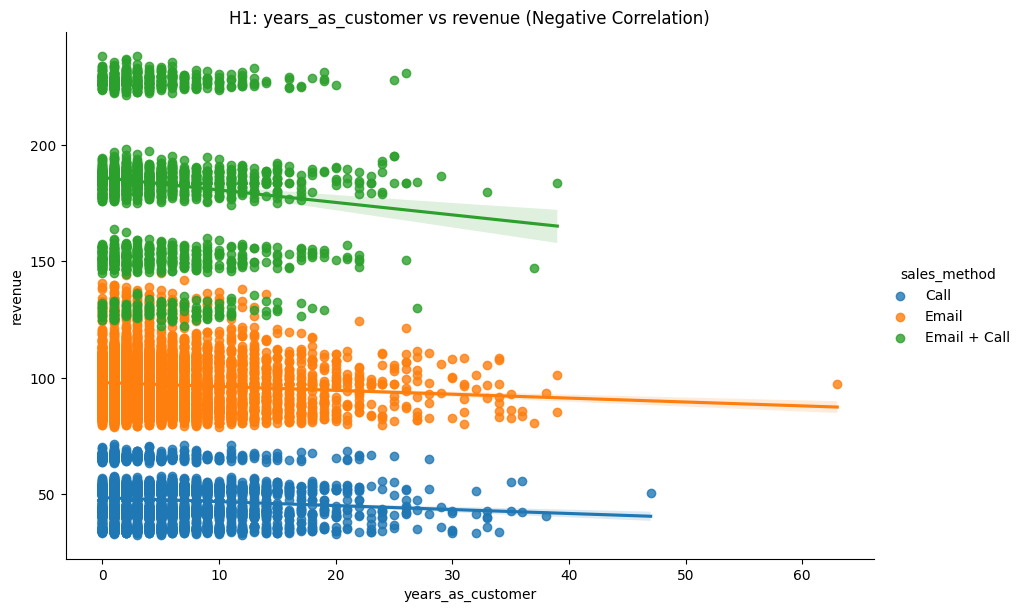

<Figure size 1000x600 with 0 Axes>

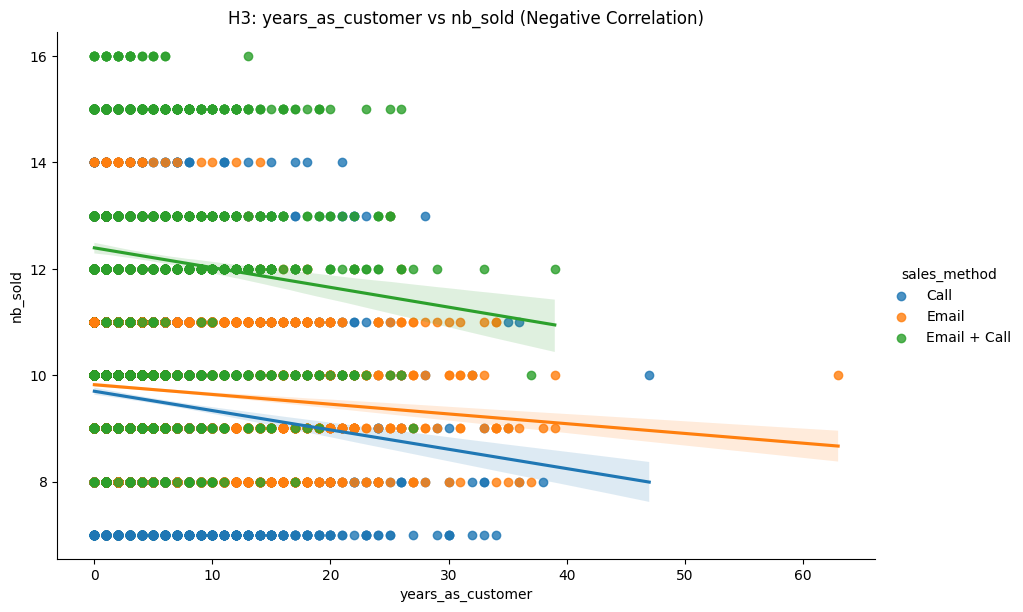

<Figure size 1000x600 with 0 Axes>

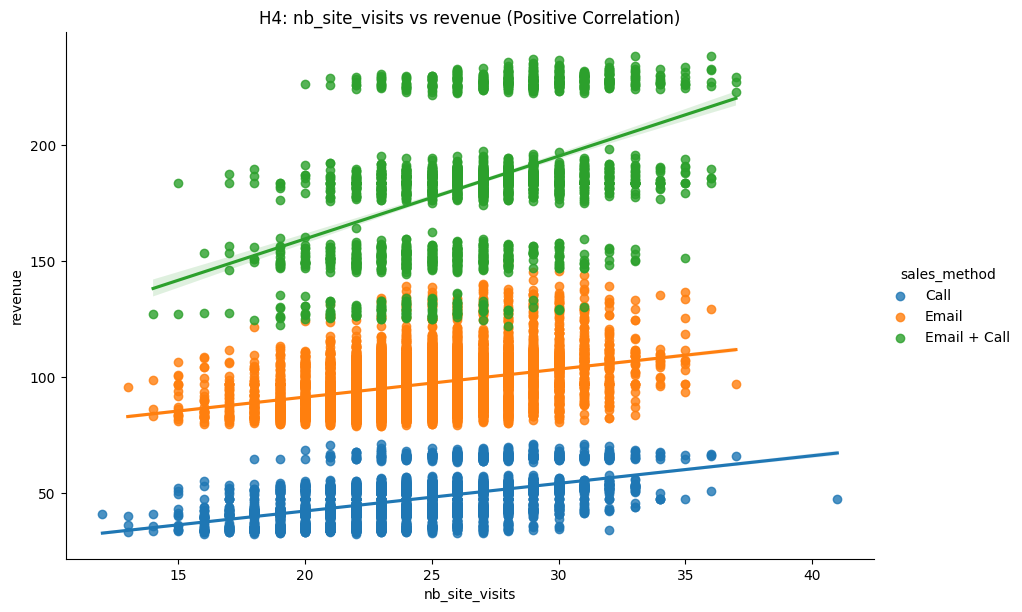

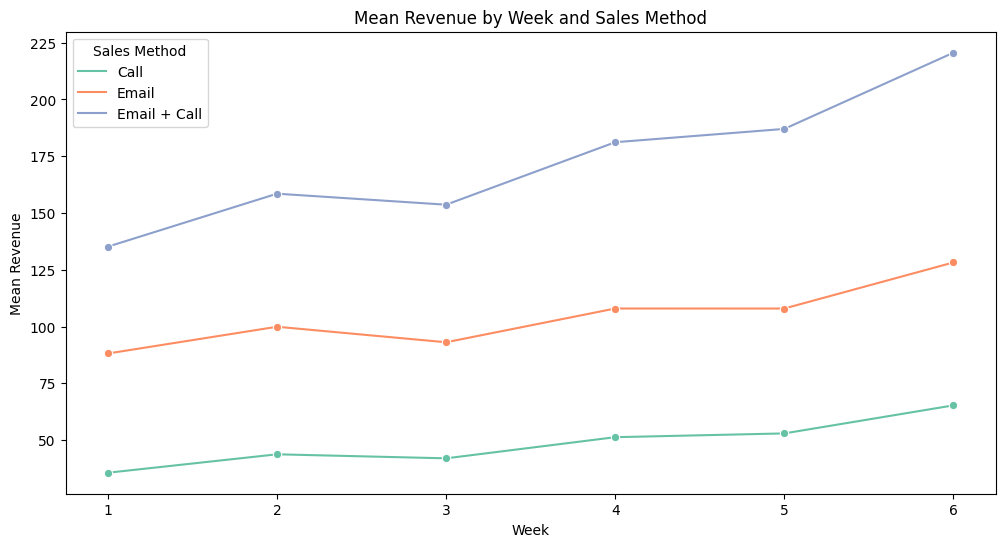

In [27]:
# Hypothesis 1: Line plot with a regression model of 'years_as_customer' vs 'revenue' for each sales method
plt.figure(figsize=(10, 6))
sns.lmplot(data=df, x='years_as_customer', y='revenue', hue='sales_method', height=6, aspect=1.5)
plt.title("H1: years_as_customer vs revenue (Negative Correlation)")
plt.show()

# Hypothesis 3: Line plot with a regression model of 'years_as_customer' vs 'nb_sold' for each sales method
plt.figure(figsize=(10, 6))
sns.lmplot(data=df, x='years_as_customer', y='nb_sold', hue='sales_method', height=6, aspect=1.5)
plt.title("H3: years_as_customer vs nb_sold (Negative Correlation)")
plt.show()

# Hypothesis 4: Line plot with a regression model of 'nb_site_visits' vs 'revenue' for each sales method
plt.figure(figsize=(10, 6))
sns.lmplot(data=df, x='nb_site_visits', y='revenue', hue='sales_method', height=6, aspect=1.5)
plt.title("H4: nb_site_visits vs revenue (Positive Correlation)")
plt.show()

# Hypothesis 5: week and mean revenue
mean_revenue_by_week = df.groupby(['sales_method', 'week']).agg({'revenue': 'mean'}).reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='week', y='revenue', hue='sales_method', data=mean_revenue_by_week, palette='Set2', marker='o')
plt.title('Mean Revenue by Week and Sales Method')
plt.xlabel('Week')
plt.ylabel('Mean Revenue')
plt.legend(title='Sales Method')
plt.show()

<h1 style="font-size: 25px;">BUSINESS METRICS</h1>

Percentage of total revenue contributed by each sales method (Call, Email, and Email + Call).

This metric will help the business monitor the effectiveness of each sales method in generating revenue. By tracking the percentage of total revenue contributed by each method, the company can identify which methods are driving the most sales and make informed decisions on resource allocation and sales strategy adjustments.

Initial values for the metric (based on the provided data):

1. Call method: (Call revenue / Total revenue) * 100 = (236,179 / 1,433,685) * 100 = 16.47%

2. Email method: (Email revenue / Total revenue) * 100 = (725,155 / 1,433,685) * 100 = 50.58%

3. Email + Call method: (Email + Call revenue / Total revenue) * 100 = (472,351 / 1,433,685) * 100 = 32.95%

These initial values indicate that the Email method currently contributes the majority of the total revenue (46.43%), followed by the Email + Call method (39.44%) and the Call method (14.13%). By monitoring these percentages over time, the business can assess the effectiveness of each sales method and adjust their sales strategy accordingly to achieve the best results.

<h1 style="font-size: 25px;">Conclusion:</h1>

1. The Email method reached the highest number of customers, while the Email + Call method had the lowest number of customers. However, the Email + Call method was the most effective in generating revenue per customer, followed by Email and Call methods.
2. Revenue trends over time showed that Email + Call revenue increased, while Email revenue decreased and Call revenue remained relatively stable.
3. There was a weak negative relationship between 'years_as_customer' and revenue for all three sales methods.
4. The number of site visits had a positive relationship with revenue for all sales methods, with the strongest relationship observed for the Call method.
5. The week of the sale had a significant impact on revenue for all three methods, with varying patterns of revenue fluctuation observed across weeks.

<h1 style="font-size: 25px;">Recommendation:</h1>

Based on the analysis, I recommend implementing a combined sales approach that leverages the strengths of both the Email and Email + Call methods, while also taking into consideration the significant relationships found in the data:

1. Focus on acquiring new customers, as they are more likely to generate higher revenue and purchase more products. Implement personalized marketing campaigns to engage and convert potential customers.

2. Increase site visits through targeted advertising, promotions, and content marketing to boost revenue generation, as there is a positive relationship between the number of site visits and revenue.

3. Use the Email method as the primary method to reach a large number of potential customers with minimal resource investment.

4. Identify customers with higher potential conversion rates from the Email method, especially those with a higher number of site visits, and follow up with the Email + Call method for these select customers. This will focus the sales team's resources on the most promising leads, thereby increasing conversion rates and maximizing revenue generation.

5. Continuously monitor and evaluate the performance of both methods, conducting data analysis to assess the effectiveness of the Email + Call method and identifying trends or changes in customer behavior.

In summary, adopting a combined sales approach that leverages the strengths of both the Email and Email + Call methods, while also considering the significant relationships found in the data, will maximize reach, conversion rates, and revenue generation. Continuous monitoring and evaluation of this approach will ensure its effectiveness and enable data-driven adjustments to the company's sales strategy as needed, ensuring continued success and growth.